In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import LSTM, Embedding, Dense, Dropout, Activation, Bidirectional
from tensorflow.keras.layers import Input, Flatten, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [5]:
import os
os.getcwd()

'/Users/chanifrusydi'

In [3]:
with open('/Users/chanifrusydi/intents.json') as f:
    data = json.load(f)


In [4]:
tags = []
inputs = []
responses={}
for intent in data['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['input']:
    inputs.append(lines)
    tags.append(intent['tag'])

In [5]:
data = pd.DataFrame({"inputs":inputs,
                     "tags":tags})

In [33]:
data

,inputs,tags
0,hello,greeting
1,hi,greeting
2,Hi,greeting
3,hey,greeting
4,hey there,greeting
5,hey there!,greeting
6,bye,goodbye
7,goodbye,goodbye
8,see you later!,goodbye
9,thank you,thanks


In [6]:
data = data.sample(frac=1)

In [7]:
data

,inputs,tags
20,how much money you have,financial planning
10,thanks,thanks
11,how are you,how are you
1,hi,greeting
3,hey,greeting
18,I want to be a,career planning
5,hey there!,greeting
13,how is your day,how are you
19,I have million of dollar,financial planning
4,hey there,greeting


In [36]:
import string
data['inputs'] = data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: ''.join(wrd))
data

,inputs,tags
19,i have million of dollar,financial planning
14,what is your name,what is your name
6,bye,goodbye
12,how are you doing,how are you
5,hey there,greeting
2,hi,greeting
1,hi,greeting
0,hello,greeting
10,thanks,thanks
15,who are you,what is your name


In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])
#apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

#encoding the outputs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

In [38]:
input_shape = x_train.shape[1]
print(input_shape)

7


In [9]:
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length = le.classes_.shape[0]
print("output length: ",output_length)

number of unique words :  41
output length:  7


In [13]:
i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(100,return_sequences=True)(x)
x = LSTM(20,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length,activation="softmax")(x)
model  = Model(i,x)


In [40]:
chatbot_model =tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(input_shape,)),
    tf.keras.layers.Embedding(vocabulary+1,10),
    tf.keras.layers.LSTM(200,return_sequences=True),
    tf.keras.layers.LSTM(100,return_sequences=True),
    tf.keras.layers.LSTM(50,return_sequences=True),
    tf.keras.layers.LSTM(20,return_sequences=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(output_length,activation="softmax")
])

In [42]:
chatbot_model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
chatbot_model.fit(x_train,y_train,batch_size=32,epochs=500)

Epoch 1/500


2022-05-06 13:32:50.612339: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-06 13:32:51.015674: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-06 13:32:51.061670: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-06 13:32:51.097457: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-06 13:32:51.134408: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-06 13:32:51.189447: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-06 13:32:51.256941: I tensorflow/core/grappler/optimizers/cust

1/1 [==============================] - 3s 3s/step - loss: 0.6810 - accuracy: 0.6818
Epoch 2/500
1/1 [==============================] - 0s 39ms/step - loss: 2.4685 - accuracy: 0.2727
Epoch 3/500
1/1 [==============================] - 0s 32ms/step - loss: 0.6917 - accuracy: 0.7273
Epoch 4/500
1/1 [==============================] - 0s 34ms/step - loss: 0.8097 - accuracy: 0.6364
Epoch 5/500
1/1 [==============================] - 0s 29ms/step - loss: 1.0811 - accuracy: 0.4545
Epoch 6/500
1/1 [==============================] - 0s 29ms/step - loss: 1.0768 - accuracy: 0.5000
Epoch 7/500
1/1 [==============================] - 0s 35ms/step - loss: 0.9023 - accuracy: 0.6364
Epoch 8/500
1/1 [==============================] - 0s 28ms/step - loss: 0.7854 - accuracy: 0.6818
Epoch 9/500
1/1 [==============================] - 0s 32ms/step - loss: 0.7457 - accuracy: 0.6818
Epoch 10/500
1/1 [==============================] - 0s 30ms/step - loss: 0.7985 - accuracy: 0.5909
Epoch 11/500
1/1 [===============

Text(0.5, 0, 'epoch')

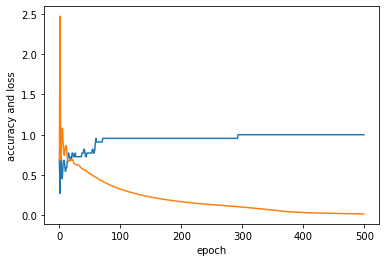

In [43]:
plt.plot(chatbot_model.history.history["accuracy"])
plt.plot(chatbot_model.history.history["loss"])
plt.ylabel("accuracy and loss")
plt.xlabel("epoch")

In [14]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [15]:
history=model.fit(x_train,y_train,epochs=200)

Epoch 1/200


2022-05-06 13:16:08.552750: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-06 13:16:09.749856: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-06 13:16:09.983033: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-06 13:16:10.425193: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-06 13:16:10.686697: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-06 13:16:11.012479: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step - loss: 1.9459 - accuracy: 0.1250
Epoch 2/200
1/1 [==============================] - 0s 22ms/step - loss: 1.9449 - accuracy: 0.1875
Epoch 3/200
1/1 [==============================] - 0s 20ms/step - loss: 1.9438 - accuracy: 0.1875
Epoch 4/200
1/1 [==============================] - 0s 18ms/step - loss: 1.9427 - accuracy: 0.1875
Epoch 5/200
1/1 [==============================] - 0s 19ms/step - loss: 1.9415 - accuracy: 0.1875
Epoch 6/200
1/1 [==============================] - 0s 21ms/step - loss: 1.9403 - accuracy: 0.1875
Epoch 7/200
1/1 [==============================] - 0s 18ms/step - loss: 1.9389 - accuracy: 0.1875
Epoch 8/200
1/1 [==============================] - 0s 21ms/step - loss: 1.9375 - accuracy: 0.1875
Epoch 9/200
1/1 [==============================] - 0s 20ms/step - loss: 1.9359 - accuracy: 0.1875
Epoch 10/200
1/1 [==============================] - 0s 18ms/step - loss: 1.9342 - accuracy: 0.1875
Epoch 11/200
1/1 [===============

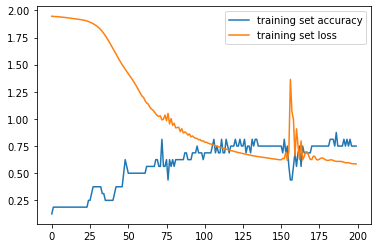

In [16]:
plt.plot(history.history['accuracy'],label='training set accuracy')
plt.plot(history.history['loss'],label='training set loss')
plt.legend()

In [45]:
import random


while True:
  texts_p = []
  prediction_input = input('You : ')

  #removing punctuation and converting to lowercase
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  #tokenizing and padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)

  #getting output from model
  output = model.predict(prediction_input)
  output = output.argmax()

  #finding the right tag and predicting
  response_tag = le.inverse_transform([output])[0]
  print("Chatbot : ",random.choice(responses[response_tag]))
  if response_tag == "goodbye":
    break

Chatbot :  Bye!


In [10]:
x_train

array([[ 0,  0,  2, 16,  7,  1,  8],
       [ 0,  0,  0,  0,  0,  0, 17],
       [ 0,  0,  0,  0,  2,  3,  1],
       [ 0,  0,  0,  0,  0,  0,  9],
       [ 0,  0,  0,  0,  0,  0,  4],
       [ 0,  0,  5, 18, 19, 20, 10],
       [ 0,  0,  0,  0,  0,  4, 11],
       [ 0,  0,  0,  2,  6, 12, 21],
       [ 0,  0,  5,  8, 22, 13, 23],
       [ 0,  0,  0,  0,  0,  4, 11],
       [ 0,  0,  0, 14,  6, 12, 24],
       [ 0,  0,  0,  2,  3,  1, 25],
       [ 0,  0,  0,  0,  0,  0, 26],
       [ 0,  0,  0,  0,  0,  0, 27],
       [ 0,  0,  0,  0, 28,  1, 29],
       [ 0,  0, 30, 31, 32, 15, 33],
       [ 0,  0, 14,  6, 15, 34, 35],
       [ 5, 36, 10, 37, 13,  7, 38],
       [ 0,  0,  0,  0, 39,  3,  1],
       [ 0,  0,  0,  0,  0,  0,  9],
       [ 0,  0,  0,  0,  0,  0, 40],
       [ 0,  0,  0,  0,  0, 41,  1]], dtype=int32)

In [11]:
y_train

array([1, 5, 4, 3, 3, 0, 3, 4, 1, 3, 6, 4, 2, 2, 2, 0, 0, 1, 6, 3, 3, 5])